# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

At present, the following methods are available:

- `process_over`
- `quantiles_over`
- `groupby`
- `groupby_all_except`

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<scmdata.ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  At

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a dataframe as its first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
        

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.658269   
                        W/m^2 Radiative Forcing                 0.712048   
                        ppm   Atmospheric Concentrations|CO2    0.526663   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.836190   
                        W/m^2 Radiative Forcing                 0.972402   
                        ppm   Atmospheric Concentrations|CO2    0.659059   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.599715   
                        W/m^2 Radiative Forcing                 1.029715   
                        ppm   Atmospheric Concentrations|CO2    1.439722   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.037293   
                        W/m^2 Radiative Forcing                 2.013184   
                        ppm   Atmospheric Concentrations|CO2    2.345199   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.618557   
                        W/m^2 Radiative Forcing                 2.102294   
                        ppm   Atmospheric Concentrations|CO2    1.968416   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.641167   
                        W/m^2 Radiative Forcing                 3.154057   
                        ppm   Atmospheric Concentrations|CO2    4.012212   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.931589   
                        W/m^2 Radiative Forcing                 2.613863   
                        ppm   Atmospheric Concentrations|CO2    4.172893   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               3.214864   
                        W/m^2 Radiative Forcing                 3.163252   
                        ppm   Atmospheric Concentrations|CO2    3.547435   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               4.498999  ...   
                        W/m^2 Radiative Forcing                 4.635940  ...   
                        ppm   Atmospheric Concentrations|CO2    5.201164  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.835066   
                        W/m^2 Radiative Forcing                 0.734636   
                        ppm   Atmospheric Concentrations|CO2    0.494371   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.602426   
                        W/m^2 Radiative Forcing                 0.928747   
                        ppm   Atmospheric Concentrations|CO2    0.501634   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.345449   
                        W/m^2 Radiative Forcing                 0.802487   
                        ppm   Atmospheric Concentrations|CO2    1.234500   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.128840   
                        W/m^2 Radiative Forcing                 1.819521   
                        ppm   Atmospheric Concentrations|CO2    2.651158   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.690848   
                        W/m^2 Radiative Forcing                 2.472537   
                        ppm   Atmospheric Concentrations|CO2    1.544440   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.978068   
                        W/m^2 Radiative Forcing                 3.114060   
                        ppm   Atmospheric Concentrations|CO2    4.009351   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.833546   
                        W/m^2 Radiative Forcing                 2.205515   
                        ppm   Atmospheric Concentrations|CO2    3.981954   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               4.167517   
                        W/m^2 Radiative Forcing                 2.854010   
                        ppm   Atmospheric Concentrations|CO2    3.309582   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               4.043195  ...   
                        W/m^2 Radiative Forcing                 5.383410  ...   
                        ppm   Atmospheric Concentrations|CO2    5.675227  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                   -0.0   
                        W/m^2 Radiative Forcing                     -0.0   
                        ppm   Atmospheric Concentrations|CO2        -0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -0.658269   
                        W/m^2 Radiative Forcing                -0.712048   
                        ppm   Atmospheric Concentrations|CO2   -0.526663   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -0.836190   
                        W/m^2 Radiative Forcing                -0.972402   
                        ppm   Atmospheric Concentrations|CO2   -0.659059   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -1.599715   
                        W/m^2 Radiative Forcing                -1.029715   
                        ppm   Atmospheric Concentrations|CO2   -1.439722   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -2.037293   
                        W/m^2 Radiative Forcing                -2.013184   
                        ppm   Atmospheric Concentrations|CO2   -2.345199   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -2.618557   
                        W/m^2 Radiative Forcing                -2.102294   
                        ppm   Atmospheric Concentrations|CO2   -1.968416   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -1.641167   
                        W/m^2 Radiative Forcing                -3.154057   
                        ppm   Atmospheric Concentrations|CO2   -4.012212   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -2.931589   
                        W/m^2 Radiative Forcing                -2.613863   
                        ppm   Atmospheric Concentrations|CO2   -4.172893   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature              -3.214864   
                        W/m^2 Radiative Forcing                -3.163252   
                        ppm   Atmospheric Concentrations|CO2   -3.547435   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature              -4.498999  ...   
                        W/m^2 Radiative Forcing                -4.635940  ...   
                        ppm   Atmospheric Concentrations|CO2   -5.201164  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    K      Surface Temperature              -29.172982
                 1       ssp119    K      Surface Temperature              -25.311469
                 2       ssp119    K      Surface Temperature              -25.825301
                 3       ssp119    K      Surface Temperature              -28.068965
                 4       ssp119    K      Surface Temperature              -28.284347
                 5       ssp119    K      Surface Temperature              -21.821092
                 6       ssp119    K      Surface Temperature              -24.034923
                 7       ssp119    K      Surface Temperature              -26.260834
                 8       ssp119    K      Surface Temperature              -23.060616
                 9       ssp119    K      Surface Temperature              -25.757249
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.284345   
                        W/m^2 Radiative Forcing                 0.560799   
                        ppm   Atmospheric Concentrations|CO2    0.326013   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.356450   
                        W/m^2 Radiative Forcing                 0.238661   
                        ppm   Atmospheric Concentrations|CO2    0.162197   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.810649   
                        W/m^2 Radiative Forcing                 0.475096   
                        ppm   Atmospheric Concentrations|CO2    0.802704   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.853927   
                        W/m^2 Radiative Forcing                 1.010121   
                        ppm   Atmospheric Concentrations|CO2    1.077649   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.451878   
                        W/m^2 Radiative Forcing                 0.754182   
                        ppm   Atmospheric Concentrations|CO2    0.679473   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.627642   
                        W/m^2 Radiative Forcing                 0.925717   
                        ppm   Atmospheric Concentrations|CO2    3.103243   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.124094   
                        W/m^2 Radiative Forcing                 1.376620   
                        ppm   Atmospheric Concentrations|CO2    3.085365   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.456187   
                        W/m^2 Radiative Forcing                 1.808925   
                        ppm   Atmospheric Concentrations|CO2    0.529699   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               2.308204  ...   
                        W/m^2 Radiative Forcing                 0.973188  ...   
                        ppm   Atmospheric Concentrations|CO2    3.104903  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   K     Surface Temperature            0.05             0.0   
                        W/m^2 Radiative Forcing              0.05             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.05             0.0   
                        K     Surface Temperature            0.17             0.0   
                        W/m^2 Radiative Forcing              0.17             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0   
                        K     Surface Temperature            0.5              0.0   
                        W/m^2 Radiative Forcing              0.5              0.0   
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0   
                        K     Surface Temperature            0.83             0.0   
                        W/m^2 Radiative Forcing              0.83             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0   
                        K     Surface Temperature            0.95             0.0   
                        W/m^2 Radiative Forcing              0.95             0.0   
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0   
                        K     Surface Temperature            mean             0.0   
                        W/m^2 Radiative Forcing              mean             0.0   
                        ppm   Atmospheric Concentrations|CO2 mean             0.0   
                        K     Surface Temperature            median           0.0   
                        W/m^2 Radiative Forcing              median           0.0   
                        ppm   Atmospheric Concentrations|CO2 median           0.0   

time                                                                   2001-01-01  \
model   region scenario unit  variable                       quantile               
example World  ssp119   K     Surface Temperature            0.05        0.093647   
                        W/m^2 Radiative Forcing              0.05        0.449000   
                        ppm   Atmospheric Concentrations|CO2 0.05        0.202574   
                        K     Surface Temperature            0.17        0.284345   
                        W/m^2 Radiative Forcing              0.17        0.560799   
                        ppm   Atmospheric Concentrations|CO2 0.17        0.326013   
                        K     Surface Temperature            0.5         0.835066   
                        W/m^2 Radiative Forcing              0.5         0.734636   
                        ppm   Atmospheric Concentrations|CO2 0.5         0.494371   
                        K     Surface Temperature            0.83        0.946713   
                        W/m^2 Radiative Forcing              0.83        0.845019   
                        ppm   Atmospheric Concentrations|CO2 0.83        0.745431   
                        K     Surface Temperature            0.95        0.954779   
                        W/m^2 Radiative Forcing              0.95        0.924942   
                        ppm   Atmospheric Concentrations|CO2 0.95        0.832047   
                        K     Surface Temperature            mean        0.658269   
                        W/m^2 Radiative Forcing              mean        0.712048   
                        ppm   Atmospheric Concentrations|CO2 mean        0.526663   
                        K     Surface Temperature            median      0.835066   
                        W/m^2 Radiative Forcing              median      0.734636   
                        ppm   Atmospheric Concentrations|CO2 median      0.494371   

time                                                                   2002-01-01  \
mod

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

/Users/znicholls/Documents/AGCEC/MCastle/scmdata/src/scmdata/run.py:168: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x12a933f90>])

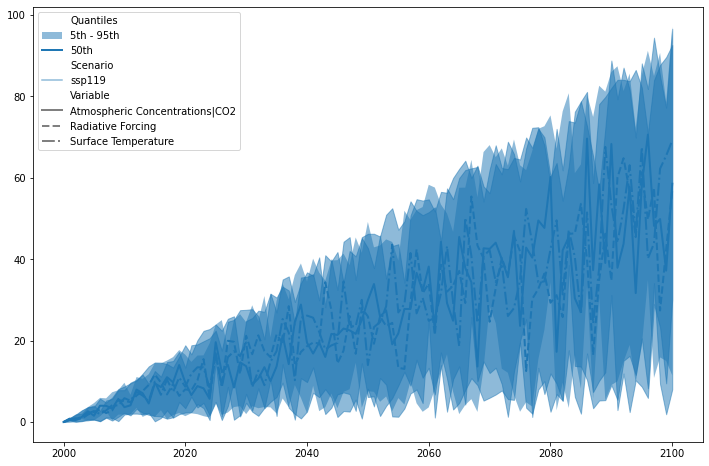

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x12aa6cb10>])

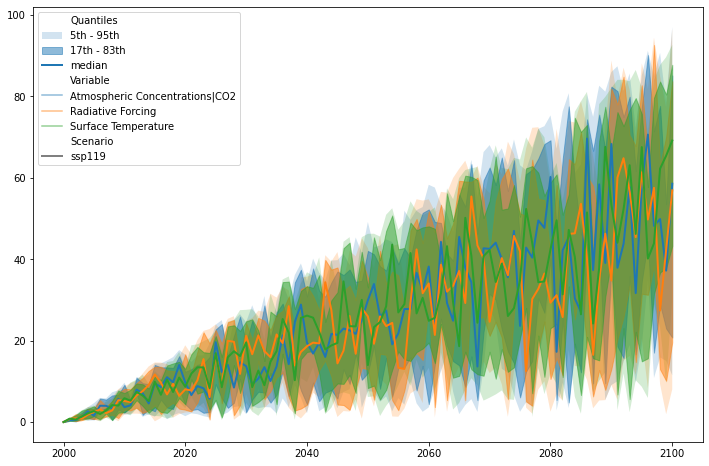

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<scmdata.ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119      K             Surface Temperature
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	3   example     0.17  World   ssp119      K             Surface Temperature
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	6   example      0.5  World   ssp119      K             Surface Temperature
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	9   example     0.83  World   ssp119      K             Surface Temperature
	10  example     0.83  World   ssp11

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x12ab9ed90>])

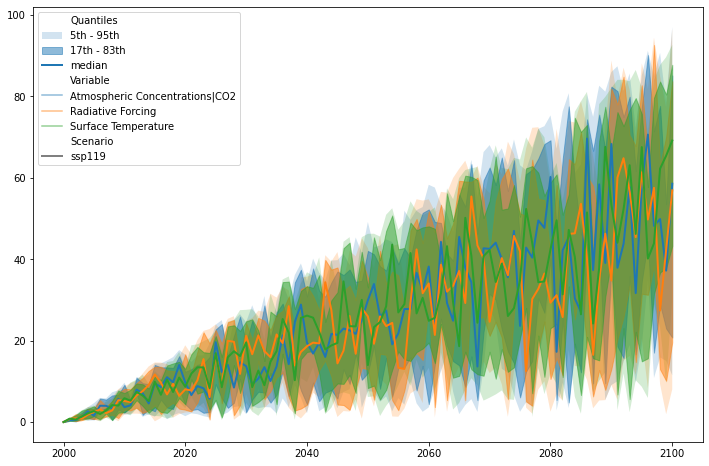

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

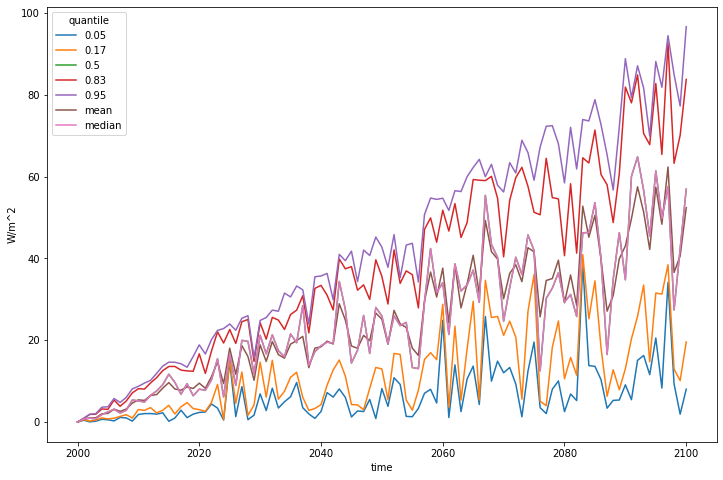

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)

## `groupby`

The `groupby` method allows us to group the data by columns in `scmrun.meta` and then perform operations. An example is given below.

In [18]:
# NBVAL_IGNORE_OUTPUT
variable_means = []
for vdf in runs.groupby("variable"):
    vdf_mean = vdf.timeseries().mean(axis=0)
    vdf_mean.name = vdf.get_unique_meta("variable", True)
    variable_means.append(vdf_mean)

pd.DataFrame(variable_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,...,2091-01-01,2092-01-01,2093-01-01,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Atmospheric Concentrations|CO2,0.0,0.526663,0.659059,1.439722,2.345199,1.968416,4.012212,4.172893,3.547435,5.201164,...,45.759076,46.688746,55.554769,36.703982,55.905946,69.011812,45.486966,52.524721,40.154863,56.392892
Radiative Forcing,0.0,0.712048,0.972402,1.029715,2.013184,2.102294,3.154057,2.613863,3.163252,4.635940,...,49.727206,57.503352,51.355333,42.184086,57.419544,48.355176,62.347072,36.555982,40.596059,52.403600
Surface Temperature,0.0,0.658269,0.836190,1.599715,2.037293,2.618557,1.641167,2.931589,3.214864,4.498999,...,40.502281,49.750104,45.821413,49.389692,51.977247,38.586584,51.566945,59.349337,59.553452,65.021359


## `groupby_all_except`

The `groupby_all_except` method allows us to group the data by all columns in `scmrun.meta` except for a certain set. Like with `groupby`, we can then use the groups to perform operations. An example is given below. Note that, in most cases, using `process_over` is likely to be more useful. 

In [19]:
# NBVAL_IGNORE_OUTPUT
ensemble_means = []
for edf in runs.groupby_all_except("run_id"):
    edf_mean = edf.timeseries().mean(axis=0)
    edf_mean.name = edf.get_unique_meta("variable", True)
    ensemble_means.append(edf_mean)

pd.DataFrame(ensemble_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,...,2091-01-01,2092-01-01,2093-01-01,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Surface Temperature,0.0,0.658269,0.836190,1.599715,2.037293,2.618557,1.641167,2.931589,3.214864,4.498999,...,40.502281,49.750104,45.821413,49.389692,51.977247,38.586584,51.566945,59.349337,59.553452,65.021359
Radiative Forcing,0.0,0.712048,0.972402,1.029715,2.013184,2.102294,3.154057,2.613863,3.163252,4.635940,...,49.727206,57.503352,51.355333,42.184086,57.419544,48.355176,62.347072,36.555982,40.596059,52.403600
Atmospheric Concentrations|CO2,0.0,0.526663,0.659059,1.439722,2.345199,1.968416,4.012212,4.172893,3.547435,5.201164,...,45.759076,46.688746,55.554769,36.703982,55.905946,69.011812,45.486966,52.524721,40.154863,56.392892


As we said, in most cases using `process_over` is likely to be more useful. For example the above can be done using `process_over` in one line (and more metadata is retained).

In [20]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", "mean")

time                                                          2000-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature                    0.0   
                        W/m^2 Radiative Forcing                      0.0   
                        ppm   Atmospheric Concentrations|CO2         0.0   

time                                                          2001-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.658269   
                        W/m^2 Radiative Forcing                 0.712048   
                        ppm   Atmospheric Concentrations|CO2    0.526663   

time                                                          2002-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               0.836190   
                        W/m^2 Radiative Forcing                 0.972402   
                        ppm   Atmospheric Concentrations|CO2    0.659059   

time                                                          2003-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.599715   
                        W/m^2 Radiative Forcing                 1.029715   
                        ppm   Atmospheric Concentrations|CO2    1.439722   

time                                                          2004-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.037293   
                        W/m^2 Radiative Forcing                 2.013184   
                        ppm   Atmospheric Concentrations|CO2    2.345199   

time                                                          2005-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.618557   
                        W/m^2 Radiative Forcing                 2.102294   
                        ppm   Atmospheric Concentrations|CO2    1.968416   

time                                                          2006-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               1.641167   
                        W/m^2 Radiative Forcing                 3.154057   
                        ppm   Atmospheric Concentrations|CO2    4.012212   

time                                                          2007-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               2.931589   
                        W/m^2 Radiative Forcing                 2.613863   
                        ppm   Atmospheric Concentrations|CO2    4.172893   

time                                                          2008-01-01  \
model   region scenario unit  variable                                     
example World  ssp119   K     Surface Temperature               3.214864   
                        W/m^2 Radiative Forcing                 3.163252   
                        ppm   Atmospheric Concentrations|CO2    3.547435   

time                                                          2009-01-01  ...  \
model   region scenario unit  variable                                    ...   
example World  ssp119   K     Surface Temperature               4.498999  ...   
                        W/m^2 Radiative Forcing                 4.635940  ...   
                        ppm   Atmospheric Concentrations|CO2    5.201164  ...   

time                                                          2091-01-01  \
model   region scenario unit  variable                                     
example World